In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as auni

from Gala_dynesty_orbit import *
# from Stream_get_data import *
from Stream_fit import *

Text(0.5, 1.0, '-0.8939811213387518')

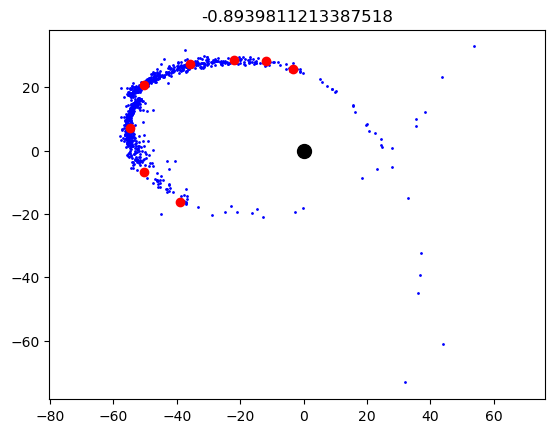

In [6]:
q_true = 0.9
seed   = np.random.randint(1, 1000)
dict_data, params_data = get_data_stream(q_true, sigma=1, seed=seed, n_ang=24, ndim=15)
xy_stream = model_stream(params_data, dt=-10)

plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1, color='b') 
plt.scatter(dict_data['x'], dict_data['y'], color='r')
plt.scatter(0,0, color='k', s=100)
plt.axis('equal')
plt.title(log_likelihood_stream(params_data, dict_data))

In [7]:
log_likelihood_stream(params_data, dict_data)

-4.730935881835997e-30

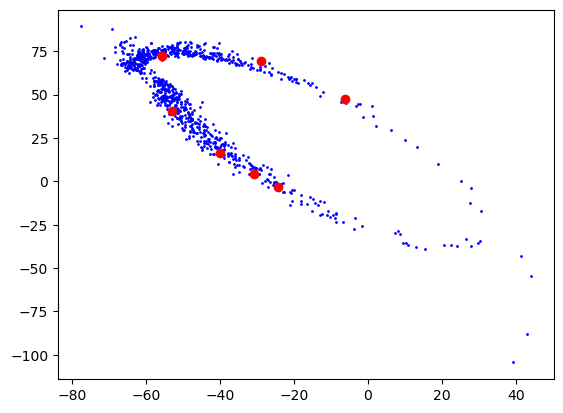

In [8]:
xy_model   = model_stream(params_data)
dict_model = get_track_stream(xy_model, sigma=0, n_ang=24)

plt.scatter(xy_model[:, 0], xy_model[:, 1], s=1, color='b')
plt.scatter(dict_model['x'], dict_model['y'], color='r')

In [12]:
xy_model   = model_stream(params_data)
dict_model = get_track_stream(xy_model, sigma=0, n_ang=24)

r_model = dict_model['r']
theta_model = dict_model['theta']

if (np.diff(theta_model) <= 0).any():
    logl = 2*VERY_BAD_VAL
else:
    cs = CubicSpline(theta_model, r_model, extrapolate=False)

    r_data = dict_data['r']
    theta_data = dict_data['theta']
    r_sig = dict_data['r_sig']

    r_model = cs(theta_data)

    if (theta_data.min() >= theta_model.min() ) & (theta_data.max() <= theta_model.max()):
        logl = -.5 * np.sum( ( (cs(theta_data) - r_data) / r_sig )**2 )
    else:
        logl = VERY_BAD_VAL
        penalty  = max((np.maximum(theta_data, theta_model.min()) - theta_model.min())**2)
        penalty += max((np.minimum(theta_data, theta_model.max()) - theta_model.max())**2)
        logl = logl - np.abs(BAD_VAL) / 10000 * penalty 

print(logl)

-0.06436605754940511


(array([  12.,   28.,  161.,  463., 1009., 1831., 2904., 2633.,  877.,
          82.]),
 array([0.52709426, 0.5738232 , 0.62055214, 0.66728108, 0.71401002,
        0.76073896, 0.8074679 , 0.85419684, 0.90092578, 0.94765472,
        0.99438366]),
 <BarContainer object of 10 artists>)

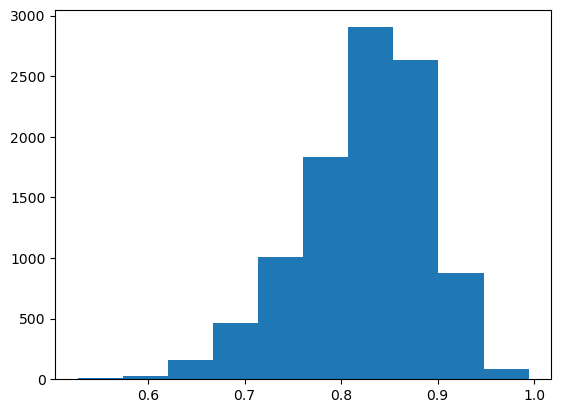

In [19]:
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

# Parameters for the skewed Gaussian distribution
a = -3  # skewness parameter
loc = 0.9  # mean
scale = 0.1  # standard deviation

# Number of points to sample
N = 10000

# Sample N points from the skewed Gaussian distribution
samples = skewnorm.rvs(a, loc=loc, scale=scale, size=N)

# Print the sampled points
plt.hist(samples)

In [20]:
samples.max()

0.994383660582646